### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np

m = np.arange(12).reshape((3,4))

print("Shape of the array:", m.shape)
print("Row:", m.shape[0])
print("Column:", m.shape[1])
print("Mean with numpy:", np.mean(m))
print("Mean:", m.mean())
print(m)

Shape of the array: (3, 4)
Row: 3
Column: 4
Mean with numpy: 5.5
Mean: 5.5
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [17]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#numpy
resNP = np.outer(u,v)
print("ResNP:", resNP)

#list
resList = np.array([i*v for i in u])
print("ResList:", resList)

#broadcasting
resBroad = np.array(u[:,np.newaxis]*v)
print("ResBroad:", resBroad)

ResNP: [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
ResList: [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
ResBroad: [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [22]:
np.random.seed(1123211)

randArray = np.random.rand(10,6)
print("RandArray without mask:", randArray)
randArray[randArray <0.1] = 0
print("RandArray with mask:", randArray)

RandArray without mask: [[0.81295394 0.54457811 0.5920477  0.70338538 0.5551604  0.24023557]
 [0.28499218 0.27068515 0.7320247  0.45302814 0.06884148 0.88704804]
 [0.41553103 0.97615693 0.75339708 0.72412245 0.19413663 0.67296134]
 [0.68723939 0.30378306 0.12092152 0.17223352 0.2684805  0.23600978]
 [0.71643152 0.15654425 0.63712816 0.25590523 0.3733493  0.22240053]
 [0.11880421 0.82496505 0.80982942 0.28869584 0.97704188 0.80334237]
 [0.94301876 0.39783699 0.67568812 0.91359651 0.02693902 0.22043285]
 [0.29370172 0.84103748 0.28840564 0.89845647 0.7794459  0.52282881]
 [0.14894289 0.25538997 0.07429533 0.32230738 0.47898611 0.64581623]
 [0.55367957 0.22745311 0.11735168 0.59609221 0.86110788 0.20274419]]
RandArray with mask: [[0.81295394 0.54457811 0.5920477  0.70338538 0.5551604  0.24023557]
 [0.28499218 0.27068515 0.7320247  0.45302814 0.         0.88704804]
 [0.41553103 0.97615693 0.75339708 0.72412245 0.19413663 0.67296134]
 [0.68723939 0.30378306 0.12092152 0.17223352 0.2684805  

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

Limited Linespace: [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866] 

Reverse Limited Linespace: [0.57119866 0.50773215 0.44426563 0.38079911 0.31733259 0.25386607
 0.19039955 0.12693304 0.06346652 0.        ] 

Result: [0.7615982190520711, 0.8250647373064104, 3.8714576135146945, 3.934924131769034]
Points where cos(x) and sen(x) are close: 
 [0.7615982190520711, 0.8250647373064104, 3.8714576135146945, 3.934924131769034]


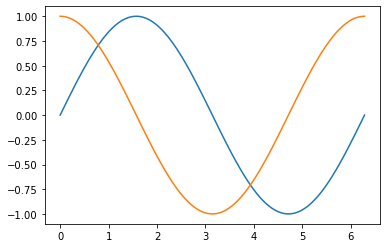

In [72]:
from math import sin, cos

lin = np.linspace(0, 2*math.pi, 100)
limLin = lin[:10]
print("Limited Linespace:", limLin, '\n')
limLinRev = limLin[::-1]
print("Reverse Limited Linespace:", limLinRev, '\n')
limLinEx = [x for x in lin if np.absolute(np.cos(x)-np.sin(x))<0.1]
print("Result:", limLinEx)

import matplotlib.pyplot as plt
%matplotlib inline

sin = np.sin(lin)
cos = np.cos(lin)

simil = [x for x in lin if np.absolute(np.sin(x)-np.cos(x))<0.1]
print("Points where cos(x) and sen(x) are close: \n",simil)

plt.plot(lin,sin)
plt.plot(lin,cos)
plt.show()


5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [45]:
def mult_table(n):
    rng = np.arange(1, n+1)
    return rng * rng[:, None]

multTable = mult_table(10)
trace = np.trace(multTable)
print("Trace:", trace)
antd = np.fliplr(multTable).diagonal()
print("Antidaigonal:", antd)
diag = np.diagonal(multTable, offset = 1)
print("Diagonal:", diag)

Trace: 385
Antidaigonal: [10 18 24 28 30 30 28 24 18 10]
Diagonal: [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [74]:
route66 = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
d2Grid = route66 - route66.reshape(10,1)
costKm = 1.60934
print("Grid: \n", format(d2Grid))
print("Grid in km: \n", format(d2Grid*costKm))

Grid: 
 [[    0   198   303   736   871  1175  1475  1544  1913  2448]
 [ -198     0   105   538   673   977  1277  1346  1715  2250]
 [ -303  -105     0   433   568   872  1172  1241  1610  2145]
 [ -736  -538  -433     0   135   439   739   808  1177  1712]
 [ -871  -673  -568  -135     0   304   604   673  1042  1577]
 [-1175  -977  -872  -439  -304     0   300   369   738  1273]
 [-1475 -1277 -1172  -739  -604  -300     0    69   438   973]
 [-1544 -1346 -1241  -808  -673  -369   -69     0   369   904]
 [-1913 -1715 -1610 -1177 -1042  -738  -438  -369     0   535]
 [-2448 -2250 -2145 -1712 -1577 -1273  -973  -904  -535     0]]
Grid in km: 
 [[    0.        318.64932   487.63002  1184.47424  1401.73514  1890.9745
   2373.7765   2484.82096  3078.66742  3939.66432]
 [ -318.64932     0.        168.9807    865.82492  1083.08582  1572.32518
   2055.12718  2166.17164  2760.0181   3621.015  ]
 [ -487.63002  -168.9807      0.        696.84422   914.10512  1403.34448
   1886.14648  1997.1909

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [76]:
import math 

N = 100
def sieve(N):
    matrix = np.ones((N-1,), dtype=bool)
    num = np.array([x for x in range(1,N)])
    for n in range(2,math.ceil(N/2)):
        prime_cond = (num%n==0) & (num > n)
        matrix[prime_cond] = False
        

def sieveOfEra(N):
    matrix = np.ones((N-1,), dtype=bool)
    num = np.array([x for x in range(1,N)])
    
    for k in range(2,math.ceil(N/2)-1):
        if(matrix[k]):
            for j in range(k**2,N-1):
                matrix[j] = False
                
# Some proves

%timeit -n 10 sieve(N)
%timeit -n 10 sieveOfEra(N)
%timeit -n 10 sieve(10*N)
%timeit -n 10 sieveOfEra(10*N)

397 µs ± 196 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
28.8 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.17 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
314 µs ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

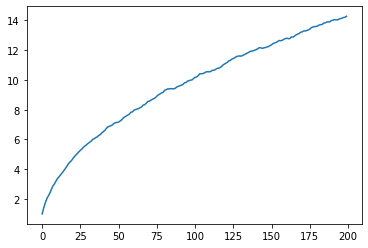

In [77]:
np.random.seed(2313)

walkers = np.zeros((1000,200))
for i in range(walkers.shape[0]):
    matrix = np.random.randint(-1,1,size=walkers.shape[1]) 
    matrix[matrix==0]=1
    walkers[i] = matrix

sum_ = np.cumsum(walkers, axis=1)
squared_sum= sum_**2
mean_ = np.mean(squared_sum, axis=0)
plt_x = plt
plt_x.plot(mean_**0.5)
plt_x.show()

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

zsh:1: command not found: wget
array dimensions (rank): 2


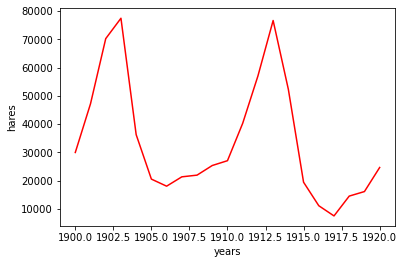

max: 77400.0
mean: 34080.95238095238
standard deviation: 20897.906458089667


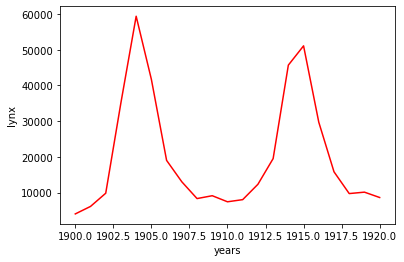

max: 59400.0
mean: 20166.666666666668
standard deviation: 16254.591536908763


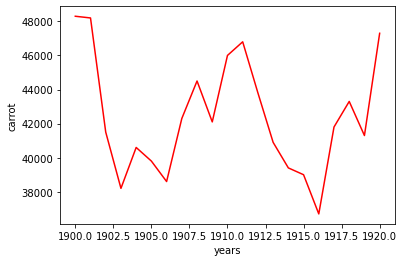

max: 48300.0
mean: 42400.0
standard deviation: 3322.5062255844787


In the 1900 year hares have the biggest population
In the 1901 year hares have the biggest population
In the 1902 year hares have the biggest population
In the 1903 year hares have the biggest population
In the 1904 year lynxes have the biggest population
In the 1905 year lynxes have the biggest population
In the 1906 year lynxes have the biggest population
In the 1907 year hares have the biggest population
In the 1908 year hares have the biggest population
In the 1909 year hares have the biggest population
In the 1910 year hares have the biggest population
In the 1911 year hares have the biggest population
In the 1912 year hares have the biggest population
In the 1913 year hares have the biggest population
In the 1914 year hares have the biggest population
In the 1915 year lynxes have the biggest population
In the 1916 year lynxes have the biggest population
In the 1917 year lynxes have the biggest population
In the 1

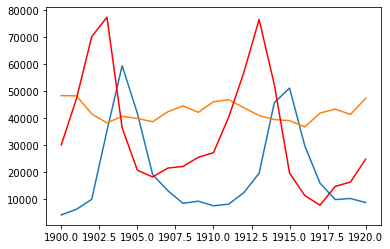

In [83]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

import numpy as np
import matplotlib.pyplot as plt

file = open('populations.txt', 'r') 

Data = np.loadtxt("populations.txt", skiprows=1)
#print(Data)
print ("array dimensions (rank):", Data.ndim)

year_data = Data[:,0]
year_hare = Data[:,1]
year_lynx = Data[:,2]
year_carrot = Data[:,3]

plt.figure()
plt.plot(year_data,year_hare, 'r')
plt.xlabel('years')
plt.ylabel('hares')
plt.show()

print ("max:", np.max(year_hare))
print ("mean:", np.mean(year_hare))
print ("standard deviation:", np.std(year_hare))

plt.figure()
plt.plot(year_data,year_lynx, 'r')
plt.xlabel('years')
plt.ylabel('lynx')
plt.show()

print ("max:", np.max(year_lynx))
print ("mean:", np.mean(year_lynx))
print ("standard deviation:", np.std(year_lynx))

plt.figure()
plt.plot(year_data,year_carrot, 'r')
plt.xlabel('years')
plt.ylabel('carrot')
plt.show()

plt.plot(year_data, year_lynx, year_data, year_carrot, year_data, year_hare, 'r')

print ("max:", np.max(year_carrot))
print ("mean:", np.mean(year_carrot))
print ("standard deviation:", np.std(year_carrot))

print("\n")
for i in range(len(year_data)):
    if year_hare[i] > year_lynx[i]:
        print("In the %s year hares have the biggest population" %int(year_data[i]))
    elif year_hare[i] == year_lynx[i]:
        print("In the %s year hares and lynxes have the same population" %int(year_data[i]))
    else:
        print("In the %s year lynxes have the biggest population" %int(year_data[i]))
        
    